In [19]:
import pandas as pd
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [33]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
X=df[['highway-mpg']]
Y=df[['price']]
lm.fit(X,Y)

In [59]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [34]:
lm.intercept_, lm.coef_

(array([38423.30585816]), array([[-821.73337832]]))

(0, 55.91663563900925)

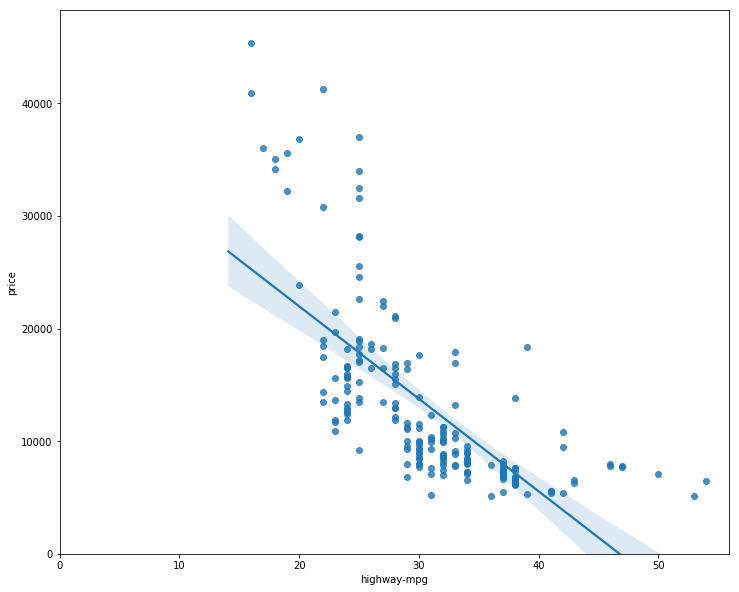

In [65]:
import seaborn as sns
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
plt.xlim(0,)

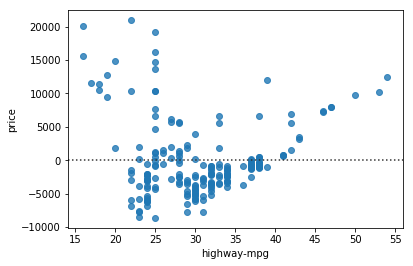

In [36]:
sns.residplot(df['highway-mpg'],df['price'])

In [66]:
Yhat=lm.predict(X)
ax1=sns.distplot(df['price'], hist=False, color='r', label='Actual value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted value', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

ValueError: shapes (201,1) and (4,1) not aligned: 1 (dim 1) != 4 (dim 0)

In [62]:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
lm.intercept_

array([-15806.62462633])

In [64]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [47]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], Yhat)

31635042.944639895

In [50]:
X=df[['highway-mpg']]
Y=df[['price']]
lm.fit(X,Y)
lm.score(X,Y)

0.4965911884339175

In [56]:
new_input = np.arange(0, 101, 1).reshape(-1, 1)
lm.predict(new_input)

array([[ 38423.30585816],
       [ 37601.57247984],
       [ 36779.83910151],
       [ 35958.10572319],
       [ 35136.37234487],
       [ 34314.63896655],
       [ 33492.90558823],
       [ 32671.1722099 ],
       [ 31849.43883158],
       [ 31027.70545326],
       [ 30205.97207494],
       [ 29384.23869662],
       [ 28562.50531829],
       [ 27740.77193997],
       [ 26919.03856165],
       [ 26097.30518333],
       [ 25275.57180501],
       [ 24453.83842668],
       [ 23632.10504836],
       [ 22810.37167004],
       [ 21988.63829172],
       [ 21166.9049134 ],
       [ 20345.17153508],
       [ 19523.43815675],
       [ 18701.70477843],
       [ 17879.97140011],
       [ 17058.23802179],
       [ 16236.50464347],
       [ 15414.77126514],
       [ 14593.03788682],
       [ 13771.3045085 ],
       [ 12949.57113018],
       [ 12127.83775186],
       [ 11306.10437353],
       [ 10484.37099521],
       [  9662.63761689],
       [  8840.90423857],
       [  8019.17086025],
       [  71

In [67]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [68]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


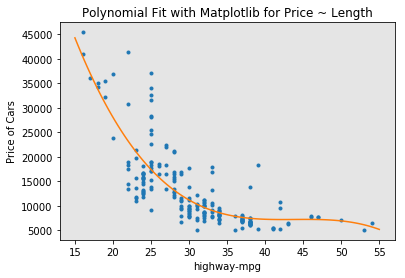

In [69]:
PlotPolly(p, x, y, 'highway-mpg')

In [70]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


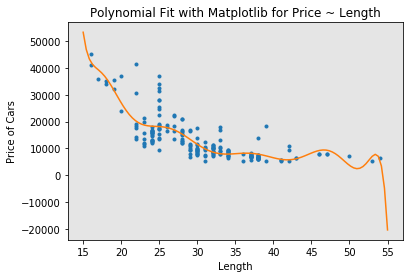

In [71]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Length')